In [3]:
import numpy as np
from sklearn.datasets import make_classification, fetch_california_housing
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd

In [2]:
def euclidian_distance(p, q):
    return np.sqrt(np.sum((p-q)**2, axis=1))

def standardise(X):
  mu = np.mean(X, 0)
  sigma = np.std(X, 0)
  X_std = (X - mu) / sigma ## <-- SOLUTION
  return X_std

In [35]:
load_data = pd.read_csv('data/fma/pca95_data.csv')

# data_ = data.set_index(data['track_id']).drop(data_.columns[0], axis=1)

X_class = load_data.iloc[1:8001, 1:208].values
y = load_data.iloc[1:8001, 208].values

print(load_data.shape)
load_data.tail(10)

NameError: name 'data' is not defined

In [31]:
X = standardise(X_class)

p = np.random.permutation(len(y))
X = X[p]
y = y[p]

split_rate = 0.7
X_train, X_test = np.split(X, [int(split_rate*(X.shape[0]))])
y_train, y_test = np.split(y, [int(split_rate*(y.shape[0]))])

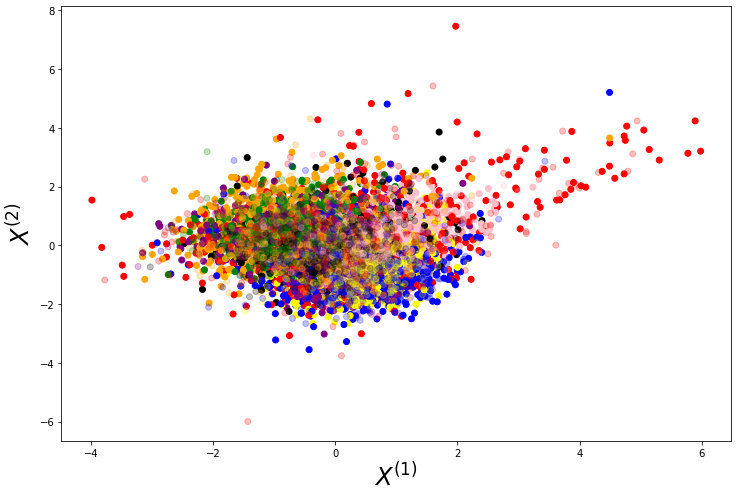

In [32]:
cm = plt.cm.RdBu
cm_bright = ListedColormap(['blue', 'red', 'green', 'yellow', 'orange', 'purple', 'black', 'pink'])

# visual exploration
plt.figure(figsize=(12,8))
plt.xlabel(r'$X^{(1)}$', size=24)
plt.ylabel(r'$X^{(2)}$', size=24)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.25)
plt.show()

In [33]:
def k_neighbours(X_train, X_test, k=5, return_distance=False):
  n_neighbours = k
  dist = []
  neigh_ind = []
  
  point_dist = [euclidian_distance(x_test, X_train) for x_test in X_test]

  for row in point_dist:
      enum_neigh = enumerate(row)
      sorted_neigh = sorted(enum_neigh, key=lambda x: x[1])[:k]

      ind_list = [tup[0] for tup in sorted_neigh]
      dist_list = [tup[1] for tup in sorted_neigh]

      dist.append(dist_list)
      neigh_ind.append(ind_list)
  
  if return_distance:
      return np.array(dist), np.array(neigh_ind)
  
  return np.array(neigh_ind)

In [17]:
def predict(X_train, y_train, X_test, k=5):
  neighbours = k_neighbours(X_train, X_test, k=k)
  y_pred = np.array([np.argmax(np.bincount(y_train[neighbour])) for neighbour in neighbours]) ## <-- SOLUTION

  return y_pred

def score(X_train, y_train, X_test, y_test, k=5):
  y_pred = predict(X_train, y_train, X_test, k=k)
  return np.float(sum(y_pred==y_test))/ float(len(y_test))

In [34]:
k = 8
print('Train set mean accuracy:', score(X_train, y_train, X_train, y_train, k=k))
print('Test set mean accuracy:', score(X_train, y_train, X_test, y_test, k=k))

C:\Users\night\AppData\Local\Temp/ipykernel_37772/1671507041.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.float(sum(y_pred==y_test))/ float(len(y_test))


Train set mean accuracy: 0.49240935881407394
Test set mean accuracy: 0.3475


In [23]:
print(len(y))

7999


In [24]:
split_rate = 0.8
X_train, X_test = np.split(X, [int(split_rate*(X.shape[0]))])
y_train, y_test = np.split(y, [int(split_rate*(y.shape[0]))])

folds_indexes = np.array_split(np.arange(len(y_train)), 5)
folds_indexes

[array([   0,    1,    2, ..., 1277, 1278, 1279]),
 array([1280, 1281, 1282, ..., 2557, 2558, 2559]),
 array([2560, 2561, 2562, ..., 3837, 3838, 3839]),
 array([3840, 3841, 3842, ..., 5117, 5118, 5119]),
 array([5120, 5121, 5122, ..., 6396, 6397, 6398])]

In [26]:
def cross_validation_score(X_train, y_train, folds, k):
  scores = []
  for i in range(len(folds)):
    val_indexes = folds[i]
    train_indexes = list(set(range(y_train.shape[0])) - set(val_indexes))
    
    X_train_i = X_train[train_indexes, :]
    y_train_i = y_train[train_indexes]


    X_val_i = X_train[val_indexes, :]
    y_val_i = y_train[val_indexes]

    score_i = score(X_train_i, y_train_i, X_val_i, y_val_i, k=k)
    scores.append(score_i)

  return sum(scores) / len(scores)

def choose_best_k(X_train, y_train, folds, k_range):
  k_scores = np.zeros((len(k_range),))
  
  for i, k in enumerate(k_range):
    k_scores[i] = cross_validation_score(X_train, y_train, folds, k)
    print(f'CV_ACC@k={k}: {k_scores[i]:.3f}')

  best_k_index = np.argmax(k_scores)
  return k_range[best_k_index]

In [27]:
best_k = choose_best_k(X_train, y_train, folds_indexes, np.arange(1, 31))

print('best_k:', best_k)

C:\Users\night\AppData\Local\Temp/ipykernel_37772/1671507041.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.float(sum(y_pred==y_test))/ float(len(y_test))


CV_ACC@k=1: 0.376
CV_ACC@k=2: 0.357
CV_ACC@k=3: 0.367
CV_ACC@k=4: 0.357
CV_ACC@k=5: 0.347
CV_ACC@k=6: 0.344
CV_ACC@k=7: 0.344
CV_ACC@k=8: 0.338
CV_ACC@k=9: 0.337
CV_ACC@k=10: 0.330
CV_ACC@k=11: 0.325
CV_ACC@k=12: 0.317
CV_ACC@k=13: 0.310
CV_ACC@k=14: 0.306
CV_ACC@k=15: 0.300
CV_ACC@k=16: 0.294
CV_ACC@k=17: 0.293
CV_ACC@k=18: 0.290
CV_ACC@k=19: 0.283
CV_ACC@k=20: 0.280
CV_ACC@k=21: 0.276
CV_ACC@k=22: 0.276
CV_ACC@k=23: 0.273
CV_ACC@k=24: 0.271
CV_ACC@k=25: 0.266
CV_ACC@k=26: 0.262
CV_ACC@k=27: 0.262
CV_ACC@k=28: 0.260
CV_ACC@k=29: 0.257
CV_ACC@k=30: 0.255
best_k: 1


In [28]:
score(X_train, y_train, X_test, y_test, k=best_k)

C:\Users\night\AppData\Local\Temp/ipykernel_37772/1671507041.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.float(sum(y_pred==y_test))/ float(len(y_test))


0.393125